# 学習結果の描画

score は学習の際に用いた値  
fitness は一定区間毎にモデルの当てはまりをテストした値

In [1]:
!python3 -m pip install seaborn

In [2]:
import os
import dill
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pwd

/Users/work/work-worldmodel2023/WorldModel2023/otk/AgileRL-MATD3/simple_reference_v3


In [4]:
# 保存済みの population を読み込み
path_pop = "./result/20240102-0837/pickle-population.pkl"

population = dill.load(open(path_pop,'rb'))

In [5]:
# population のなかに含まれる fitness を取り出す
fitnesses = [agent.fitness for agent in population]

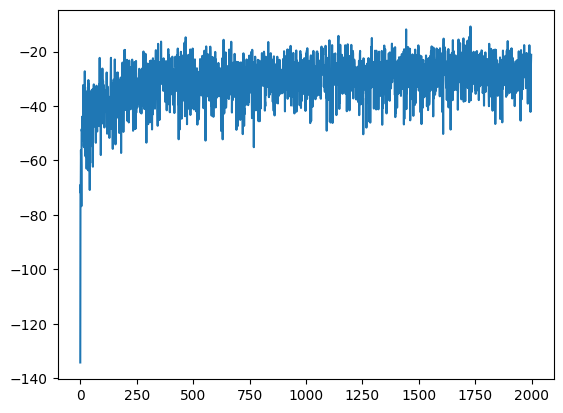

In [6]:
# fitnessを描画
plt.plot(fitnesses[0][0:-1])

In [7]:
print(fitnesses[0][0:20])

[-134.1938363488927, -68.92382533541908, -71.94726891340282, -56.17752745522758, -62.13823886557915, -76.7873430960049, -48.497356297216776, -49.259845127364144, -48.59882023381484, -43.905809025827665, -47.46236336279597, -43.77114751727651, -52.71213602647962, -32.287174050278075, -36.06545526794728, -38.12932179658973, -54.891315789713474, -47.78154779234544, -35.01794925018529, -55.25554246260219]


In [8]:
# Scoreを取り出す
scores = [agent.scores for agent in population]

print(scores[0][0:20])

[-41.88764805834371, -54.10967863967492, -58.599561429071464, -55.52379431792619, -51.387346648170066, -55.04421802336424, -31.57094727487847, -50.93616494805876, -72.39012239225292, -13.12588439423253, -51.29040437535931, -41.07140267613315, -35.00050545668604, -42.98808526178737, -49.632509342685736, -50.712457242818076, -57.199634167896484, -45.24879957892323, -66.6526577031496, -48.261162096184634]


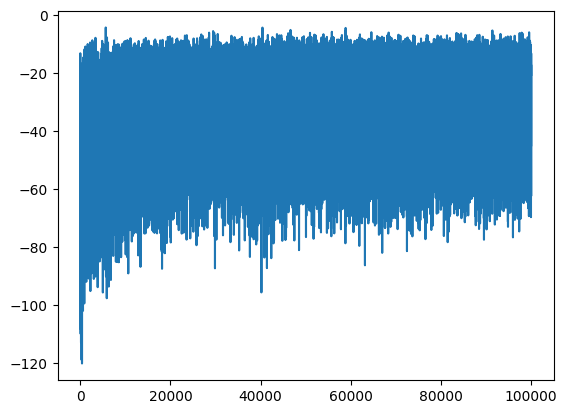

In [9]:
# Scoreを描画
plt.plot(scores[0][0:-1])

<Axes: >

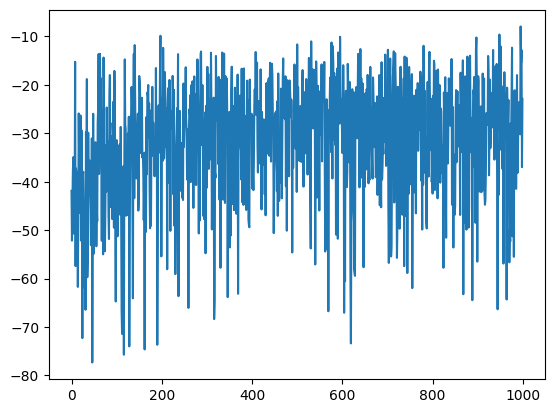

In [10]:
sns.lineplot(scores[0][0:-1:100], errorbar=('ci', 95))

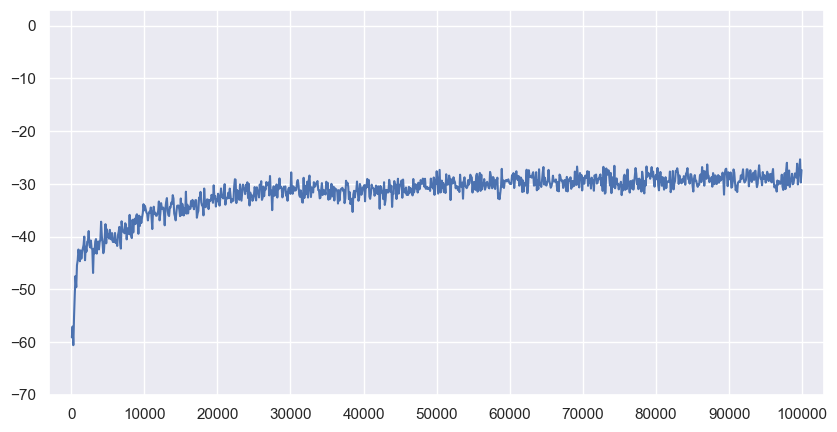

In [16]:
score = pd.DataFrame(scores[0][0:-1])
sns.set(rc={"figure.figsize": (10, 5)})

sns.lineplot(score.rolling(100, step=100).mean(), errorbar=('ci', 95), legend=False)

plt.xticks(np.arange(0, 103000, step=10000))
plt.xlim(-3000,103000)
plt.ylim(-70,3)

plt.savefig("score_simple_reference_v3.png")
plt.show()

In [12]:
score[1:101].mean()

0   -59.119766
dtype: float64